In [26]:
pip show scholarly

Name: scholarly
Version: 1.6.0
Summary: Simple access to Google Scholar authors and citations
Home-page: https://github.com/scholarly-python-package/scholarly
Note: you may need to restart the kernel to use updated packages.
Author: Steven A. Cholewiak, Panos Ipeirotis, Victor Silva, Arun Kannawadi
Author-email: steven@cholewiak.com, panos@stern.nyu.edu, vsilva@ualberta.ca, arunkannawadi@astro.princeton.edu
License: Unlicense
Location: c:\users\gabri\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages
Requires: arrow, beautifulsoup4, bibtexparser, deprecated, fake-useragent, free-proxy, python-dotenv, requests, selenium, sphinx-rtd-theme, typing-extensions
Required-by: 


In [1]:
#Imports
from scholarly import scholarly
import requests
import os
import json

In [19]:
#Search and get an author
search_query = scholarly.search_author('Sebastien Monnet')
first_author_result = next(search_query)

In [20]:
author = scholarly.fill(first_author_result )

In [22]:
# Fill the author with the publication

pub = scholarly.fill(author["publications"][0])

In [21]:
author["publications"][0]

{'container_type': 'Publication',
 'source': <PublicationSource.AUTHOR_PUBLICATION_ENTRY: 'AUTHOR_PUBLICATION_ENTRY'>,
 'bib': {'title': 'How to bring together fault tolerance and data consistency to enable grid data sharing',
  'pub_year': '2006'},
 'filled': False,
 'author_pub_id': 'Eh72wrkAAAAJ:u5HHmVD_uO8C',
 'num_citations': 58,
 'citedby_url': 'https://scholar.google.com/scholar?oi=bibs&hl=en&cites=2191032800617564143',
 'cites_id': ['2191032800617564143']}

In [23]:
pub

{'container_type': 'Publication',
 'source': <PublicationSource.AUTHOR_PUBLICATION_ENTRY: 'AUTHOR_PUBLICATION_ENTRY'>,
 'bib': {'title': 'How to bring together fault tolerance and data consistency to enable grid data sharing',
  'pub_year': 2006,
  'author': 'Gabriel Antoniu and J‐F Deverge and Sébastien Monnet',
  'journal': 'Concurrency and Computation: Practice and Experience',
  'volume': '18',
  'number': '13',
  'pages': '1705-1723',
  'publisher': 'John Wiley & Sons, Ltd.',
  'abstract': 'This paper addresses the challenge of transparent data sharing within computing Grids built as cluster federations. On such platforms, the availability of storage resources may change in a dynamic way, often due to hardware failures. We focus on the problem of handling the consistency of replicated data in the presence of failures. We propose a software architecture which decouples consistency management from fault tolerance management. We illustrate this architecture with a case study showing 

In [46]:
auteurs = []

for i in author["publications"][:10]:
    pub = scholarly.fill(i)
    print(pub["bib"]["author"])
    for aut in pub["bib"]["author"].split("and"):
        auteurs.append(aut.replace(" ",""))


Gabriel Antoniu and J‐F Deverge and Sébastien Monnet
Maxime Véron and Olivier Marin and Sébastien Monnet
Sébastien Monnet and Christine Morin and Ramamurthy Badrinath
Sergey Legtchenko and Sébastien Monnet and Pierre Sens and Gilles Muller
Gabriel Antoniu and Luc Bougé and Mathieu Jan and Sébastien Monnet
Sergey Legtchenko and Sébastien Monnet and Gaël Thomas
Guthemberg Silvestre and Sébastien Monnet and Ruby Krishnaswamy and Pierre Sens
Sébastien Monnet and Christine Morin and Ramamurthy Badrinath
Sergey Legtchenko and Sébastien Monnet and Pierre Sens and Gilles Muller
Gabriel Antoniu and Jean-François Deverge and Sébastien Monnet


In [44]:
def addDict(list):
    dict = {}
    for i in list:
        dict[i] = 0
    return dict

In [48]:
a = addDict(auteurs)

In [11]:
query = scholarly.search_pubs("A density-based algorithm for discovering clusters in large spatial databases with noise")
pub = next(query)

In [19]:
pub

{'container_type': 'Publication',
 'source': <PublicationSource.AUTHOR_PUBLICATION_ENTRY: 'AUTHOR_PUBLICATION_ENTRY'>,
 'bib': {'title': 'How to bring together fault tolerance and data consistency to enable grid data sharing',
  'pub_year': 2006,
  'author': 'Gabriel Antoniu and J‐F Deverge and Sébastien Monnet',
  'journal': 'Concurrency and Computation: Practice and Experience',
  'volume': '18',
  'number': '13',
  'pages': '1705-1723',
  'publisher': 'John Wiley & Sons, Ltd.',
  'abstract': 'This paper addresses the challenge of transparent data sharing within computing Grids built as cluster federations. On such platforms, the availability of storage resources may change in a dynamic way, often due to hardware failures. We focus on the problem of handling the consistency of replicated data in the presence of failures. We propose a software architecture which decouples consistency management from fault tolerance management. We illustrate this architecture with a case study showing 

In [4]:
# Fill the first publication
first_publication_filled = scholarly.fill(author["publications"][1])

In [5]:
author["publications"][1]

{'container_type': 'Publication',
 'source': <PublicationSource.AUTHOR_PUBLICATION_ENTRY: 'AUTHOR_PUBLICATION_ENTRY'>,
 'bib': {'title': 'Traffic matrix estimation: Existing techniques and new directions',
  'pub_year': 2002,
  'author': 'Alberto Medina and Nina Taft and Kave Salamatian and Supratik Bhattacharyya and Christophe Diot',
  'journal': 'ACM SIGCOMM Computer Communication Review',
  'volume': '32',
  'number': '4',
  'pages': '161-174',
  'publisher': 'ACM',
  'abstract': 'Very few techniques have been proposed for estimating traffic matrices in the context of Internet traffic. Our work on POP-to-POP traffic matrices (TM) makes two contributions. The primary contribution is the outcome of a detailed comparative evaluation of the three existing techniques. We evaluate these methods with respect to the estimation errors yielded, sensitivity to prior information required and sensitivity to the statistical assumptions they make. We study the impact of characteristics such as pat

In [9]:
def get_all_pdf(auteur_name,publications):
    auteur = {}
    for i in publications:
        try:
            auteur[i["author_pub_id"].split(':')[1]] = True 
            print(i["author_pub_id"])
            get_pdf(i["author_pub_id"])
        except:
            auteur[i["author_pub_id"].split(':')[1]] = False 
            print("fail" + i["author_pub_id"])
    auteur_string = json.dumps(auteur)
    with open("Google_scholar/" + publications[0]["author_pub_id"].split(':')[0]+"/"+ auteur_name +".json", 'w') as outfile:
        json.dump(auteur_string, outfile)

In [12]:
get_all_pdf("Kave",author["publications"][:5])
    

s718KIEAAAAJ:cFHS6HbyZ2cC
s718KIEAAAAJ:cFHS6HbyZ2cC
https://hal.inria.fr/hal-01097551/document
fails718KIEAAAAJ:cFHS6HbyZ2cC
s718KIEAAAAJ:dfsIfKJdRG4C
s718KIEAAAAJ:dfsIfKJdRG4C
https://dl.acm.org/doi/pdf/10.1145/633025.633041
fails718KIEAAAAJ:dfsIfKJdRG4C
s718KIEAAAAJ:yD5IFk8b50cC
s718KIEAAAAJ:yD5IFk8b50cC
https://hal.inria.fr/hal-01097554/document
fails718KIEAAAAJ:yD5IFk8b50cC
s718KIEAAAAJ:a0OBvERweLwC
s718KIEAAAAJ:a0OBvERweLwC
https://www.usenix.org/legacy/event/imc05/tech/full_papers/soule/soule.pdf
fails718KIEAAAAJ:a0OBvERweLwC
s718KIEAAAAJ:D03iK_w7-QYC
s718KIEAAAAJ:D03iK_w7-QYC
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.187.7252&amp;rep=rep1&amp;type=pdf
fails718KIEAAAAJ:D03iK_w7-QYC


FileNotFoundError: [Errno 2] No such file or directory: 'Google_scholar/s718KIEAAAAJ/Kave.json'

In [9]:
response = requests.get("https://scholar.google.com/citations?view_op=view_citation&hl=en&user=s718KIEAAAAJ&citation_for_view=s718KIEAAAAJ:dfsIfKJdRG4C")

In [10]:
response.text.split('<div class="gsc_oci_title_ggi"><a href="')[1].split('"')[0]

'https://dl.acm.org/doi/pdf/10.1145/633025.633041'

In [10]:
def get_pdf(author_pub_id):
    print(author_pub_id)
    user = author_pub_id.split(":")[0]
    url = "https://scholar.google.com/citations?view_op=view_citation&hl=en&user=" + user + "&citation_for_view=" + author_pub_id
    pdf_url = requests.get(url).text.split('<div class="gsc_oci_title_ggi"><a href="')[1].split('"')[0]
    print(pdf_url)
    pdf = requests.get(pdf_url)
    try:
        f = open("Google_scholar/" + user+"/" + author_pub_id.replace(":","_")+".pdf", 'wb')
    except:
        os.mkdir("Google_scholar/" +user)
        f = open("Google_scholar/" + user+"/" + author_pub_id.replace(":","_")+".pdf", 'wb')
    f.write(pdf.content)
    f.close()


In [12]:
get_pdf("s718KIEAAAAJ:CHSYGLWDkRkC")

s718KIEAAAAJ:CHSYGLWDkRkC
https://hal.archives-ouvertes.fr/hal-00620090/file/infocom2009.pdf


In [2]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

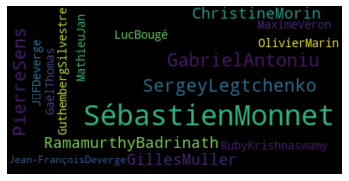

In [49]:
text = {"Kave Salamatian": 80, "Sorana": 10, "Sebastien": 40,"Moi": 10, "Dorian": 35}

# Create and generate a word cloud image:
wordcloud = WordCloud(prefer_horizontal=0.6).generate_from_frequencies(a)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()